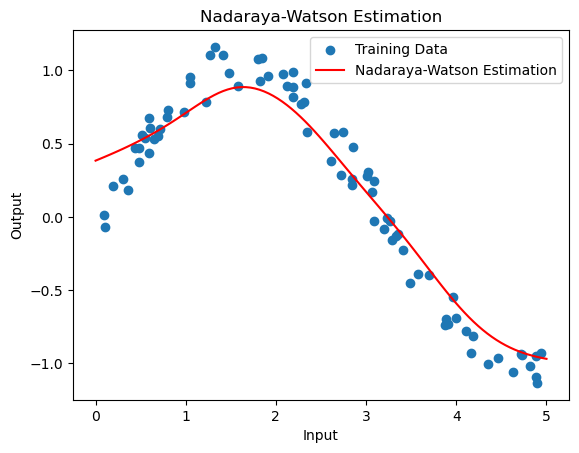

In [1]:
import numpy as np

def nadaraya_watson_estimation(x, y, x_pred, kernel_width):
    """
    Calculate the Nadaraya-Watson estimator for regression.

    Parameters:
    - x: Array of input values.
    - y: Array of corresponding output values.
    - x_pred: Array of input values for which predictions are to be made.
    - kernel_width: Width of the kernel function.

    Returns:
    - y_pred: Array of predicted output values.
    """
    y_pred = []
    
    for x_star in x_pred:
        # Calculate the kernel weights for each data point
        kernel_weights = np.exp(-(x - x_star)**2 / (2 * kernel_width**2))
        
        # Calculate the weighted average of y values using the kernel weights
        weighted_sum = np.sum(kernel_weights * y)
        total_weight = np.sum(kernel_weights)
        
        # Calculate the predicted y value
        if total_weight > 0:
            y_star = weighted_sum / total_weight
        else:
            y_star = 0  # Default prediction if total weight is 0
        
        y_pred.append(y_star)
    
    return np.array(y_pred)

# Example usage:
if __name__ == "__main__":
    # Generate some sample data
    np.random.seed(0)
    x = np.sort(5 * np.random.rand(80))
    y = np.sin(x) + 0.1 * np.random.randn(80)
    
    # Define the input values for prediction
    x_pred = np.linspace(0, 5, 100)
    
    # Set the kernel width (you can adjust this parameter)
    kernel_width = 0.5
    
    # Calculate the Nadaraya-Watson estimator
    y_pred = nadaraya_watson_estimation(x, y, x_pred, kernel_width)
    
    # Plot the results
    import matplotlib.pyplot as plt
    plt.scatter(x, y, label="Training Data")
    plt.plot(x_pred, y_pred, label="Nadaraya-Watson Estimation", color='r')
    plt.legend()
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.title("Nadaraya-Watson Estimation")
    plt.show()


In [2]:
import numpy as np

def nadaraya_watson_time_series_estimation(x, y, t_pred, bandwidth):
    """
    Calculate the Nadaraya-Watson estimator for locally stationary time series.

    Parameters:
    - x: Array of time points.
    - y: Array of corresponding time series values.
    - t_pred: Time point for which predictions are to be made.
    - bandwidth: Bandwidth of the kernel function.

    Returns:
    - y_pred: Predicted time series value at t_pred.
    """
    y_pred = 0.0
    total_weight = 0.0
    
    for i in range(len(x)):
        # Calculate the kernel weight for the ith data point
        kernel_weight = np.exp(-(t_pred - x[i])**2 / (2 * bandwidth**2))
        
        # Update the weighted sum and total weight
        y_pred += kernel_weight * y[i]
        total_weight += kernel_weight
    
    if total_weight > 0:
        y_pred /= total_weight
    
    return y_pred

# Example usage:
if __name__ == "__main__":
    # Generate some sample time series data
    np.random.seed(0)
    x = np.linspace(0, 10, 100)
    y = np.sin(x) + 0.1 * np.random.randn(100)
    
    # Define the time point for prediction
    t_pred = 5.0
    
    # Set the bandwidth (you can adjust this parameter)
    bandwidth = 1.0
    
    # Calculate the Nadaraya-Watson estimator for the time series
    y_pred = nadaraya_watson_time_series_estimation(x, y, t_pred, bandwidth)
    
    print(f"Predicted value at t={t_pred}: {y_pred:.4f}")


Predicted value at t=5.0: -0.6152


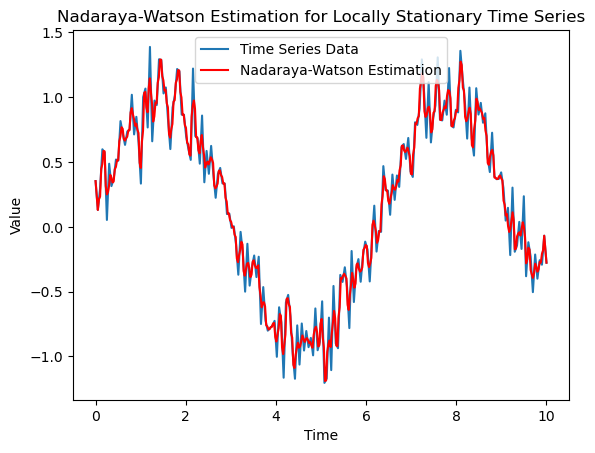

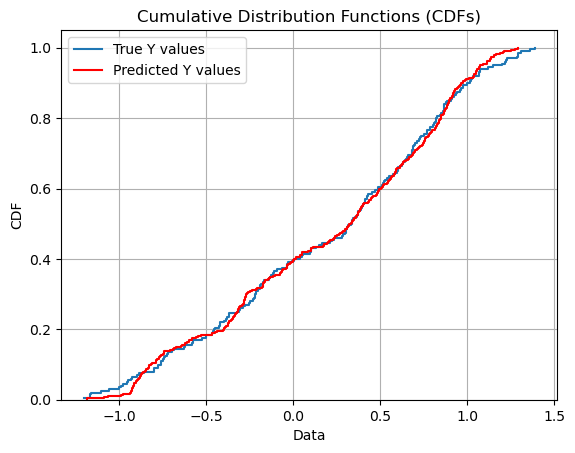

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def nadaraya_watson_local_estimation(x, y, x_pred, kernel_width):
    """
    Calculate the Nadaraya-Watson estimator for locally stationary time series data.

    Parameters:
    - x: Array of input time points.
    - y: Array of corresponding time series values.
    - x_pred: Array of input time points for which predictions are to be made.
    - kernel_width: Width of the kernel function.

    Returns:
    - y_pred: Array of predicted time series values.
    """
    y_pred = []

    for x_star in x_pred:
        # Find the indices of data points within the bandwidth of x_star
        in_bandwidth = np.abs(x - x_star) <= kernel_width
        
        # Calculate the kernel weights for data points within the bandwidth
        kernel_weights = np.exp(-(x[in_bandwidth] - x_star) ** 2 / (2 * kernel_width ** 2))

        # Calculate the weighted average of y values using the kernel weights
        weighted_sum = np.sum(kernel_weights * y[in_bandwidth])
        total_weight = np.sum(kernel_weights)

        # Calculate the predicted y value
        if total_weight > 0:
            y_star = weighted_sum / total_weight
        else:
            y_star = 0  # Default prediction if total weight is 0

        y_pred.append(y_star)

    return np.array(y_pred)

# Example usage:
if __name__ == "__main__":
    # Generate some sample locally stationary time series data
    np.random.seed(0)
    t = np.linspace(0, 10, 200)
    y = np.sin(t) + 0.2 * np.random.randn(len(t))
    
    # Define the input time points for prediction
    t_pred = np.linspace(0, 10, 400)
    
    # Set the kernel width (you can adjust this parameter)
    kernel_width = 0.05
    
    # Calculate the Nadaraya-Watson estimator for locally stationary time series
    y_pred = nadaraya_watson_local_estimation(t, y, t_pred, kernel_width)
    
    # Plot the results
    plt.plot(t, y, label="Time Series Data")
    plt.plot(t_pred, y_pred, label="Nadaraya-Watson Estimation", color='r')
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Nadaraya-Watson Estimation for Locally Stationary Time Series")
    plt.show()

    # Generate two sets of random data
data1 = y
data2 = y_pred

# Sort the data
data1_sorted = np.sort(data1)
data2_sorted = np.sort(data2)

# Calculate the CDFs
cdf1 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)
cdf2 = np.arange(1, len(data2_sorted) + 1) / len(data2_sorted)

# Plot the CDFs
plt.step(data1_sorted, cdf1, where='post', label='True Y values')
plt.step(data2_sorted, cdf2, where='post', label='Predicted Y values', color='r')
plt.xlabel('Data')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Functions (CDFs)')
plt.ylim([0, 1.05])
plt.legend()
plt.grid(True)
plt.show()

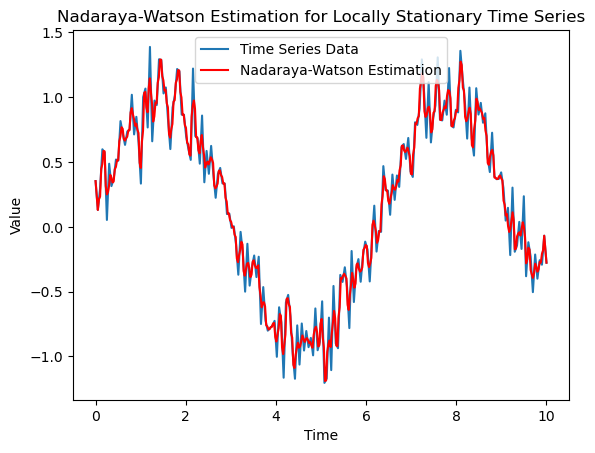

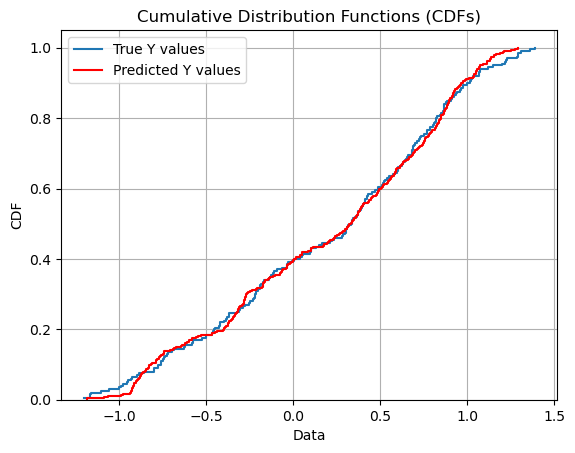

ValueError: The input distributions must have the same length.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist

def nadaraya_watson_local_estimation(x, y, x_pred, kernel_width):
    """
    Calculate the Nadaraya-Watson estimator for locally stationary time series data.

    Parameters:
    - x: Array of input time points.
    - y: Array of corresponding time series values.
    - x_pred: Array of input time points for which predictions are to be made.
    - kernel_width: Width of the kernel function.

    Returns:
    - y_pred: Array of predicted time series values.
    """
    y_pred = []

    for x_star in x_pred:
        # Find the indices of data points within the bandwidth of x_star
        in_bandwidth = np.abs(x - x_star) <= kernel_width
        
        # Calculate the kernel weights for data points within the bandwidth
        kernel_weights = np.exp(-(x[in_bandwidth] - x_star) ** 2 / (2 * kernel_width ** 2))

        # Calculate the weighted average of y values using the kernel weights
        weighted_sum = np.sum(kernel_weights * y[in_bandwidth])
        total_weight = np.sum(kernel_weights)

        # Calculate the predicted y value
        if total_weight > 0:
            y_star = weighted_sum / total_weight
        else:
            y_star = 0  # Default prediction if total weight is 0

        y_pred.append(y_star)

    return np.array(y_pred)

# Example usage:
if __name__ == "__main__":
    # Generate some sample locally stationary time series data
    np.random.seed(0)
    t = np.linspace(0, 10, 200)
    y = np.sin(t) + 0.2 * np.random.randn(len(t))
    
    # Define the input time points for prediction
    t_pred = np.linspace(0, 10, 400)
    
    # Set the kernel width (you can adjust this parameter)
    kernel_width = 0.05
    
    # Calculate the Nadaraya-Watson estimator for locally stationary time series
    y_pred = nadaraya_watson_local_estimation(t, y, t_pred, kernel_width)
    
    # Plot the results
    plt.plot(t, y, label="Time Series Data")
    plt.plot(t_pred, y_pred, label="Nadaraya-Watson Estimation", color='r')
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Nadaraya-Watson Estimation for Locally Stationary Time Series")
    plt.show()

    # Generate two sets of random data
data1 = y
data2 = y_pred

# Sort the data
data1_sorted = np.sort(data1)
data2_sorted = np.sort(data2)

# Calculate the CDFs
cdf1 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)
cdf2 = np.arange(1, len(data2_sorted) + 1) / len(data2_sorted)

# Plot the CDFs
plt.step(data1_sorted, cdf1, where='post', label='True Y values')
plt.step(data2_sorted, cdf2, where='post', label='Predicted Y values', color='r')
plt.xlabel('Data')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Functions (CDFs)')
plt.ylim([0, 1.05])
plt.legend()
plt.grid(True)
plt.show()


def wasserstein_distance(p, q):
    """
    Compute the 1-Wasserstein distance between two probability distributions p and q.

    Parameters:
    p (array-like): The first probability distribution.
    q (array-like): The second probability distribution.

    Returns:
    float: The 1-Wasserstein distance between p and q.
    """
    # Ensure p and q are numpy arrays.
    p, q = np.asarray(p), np.asarray(q)

    # Check if the distributions have the same length.
    if len(p) != len(q):
        raise ValueError("The input distributions must have the same length.")

    # Compute the cost matrix.
    cost_matrix = cdist(p[:, np.newaxis], q[:, np.newaxis])

    # Solve the linear assignment problem to find the optimal transport plan.
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Calculate the Wasserstein distance using the optimal transport plan.
    wasserstein_distance = np.sum(cost_matrix[row_ind, col_ind] * p[row_ind])

    return wasserstein_distance

# Example usage:
if __name__ == "__main__":
    # Define two example probability distributions.
    p = cdf1
    q = cdf2

    # Calculate the 1-Wasserstein distance between p and q.
    distance = wasserstein_distance(p, q)

    print("1-Wasserstein Distance: {distance}")

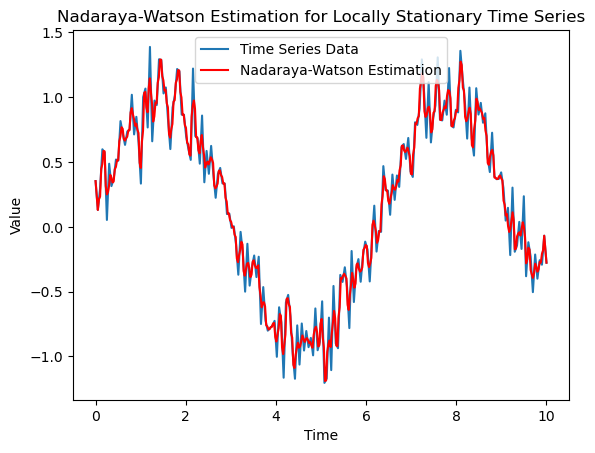

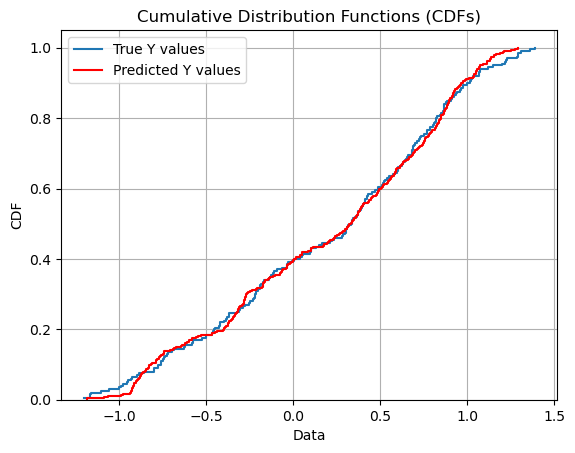

1-Wasserstein Distance: 0.0012500000000000002


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

def nadaraya_watson_local_estimation(x, y, x_pred, kernel_width):
    """
    Calculate the Nadaraya-Watson estimator for locally stationary time series data.

    Parameters:
    - x: Array of input time points.
    - y: Array of corresponding time series values.
    - x_pred: Array of input time points for which predictions are to be made.
    - kernel_width: Width of the kernel function.

    Returns:
    - y_pred: Array of predicted time series values.
    """
    y_pred = []

    for x_star in x_pred:
        # Find the indices of data points within the bandwidth of x_star
        in_bandwidth = np.abs(x - x_star) <= kernel_width
        
        # Calculate the kernel weights for data points within the bandwidth
        kernel_weights = np.exp(-(x[in_bandwidth] - x_star) ** 2 / (2 * kernel_width ** 2))

        # Calculate the weighted average of y values using the kernel weights
        weighted_sum = np.sum(kernel_weights * y[in_bandwidth])
        total_weight = np.sum(kernel_weights)

        # Calculate the predicted y value
        if total_weight > 0:
            y_star = weighted_sum / total_weight
        else:
            y_star = 0  # Default prediction if total weight is 0

        y_pred.append(y_star)

    return np.array(y_pred)

# Example usage:
if __name__ == "__main__":
    # Generate some sample locally stationary time series data
    np.random.seed(0)
    t = np.linspace(0, 10, 200)
    y = np.sin(t) + 0.2 * np.random.randn(len(t))
    
    # Define the input time points for prediction
    t_pred = np.linspace(0, 10, 400)
    
    # Set the kernel width (you can adjust this parameter)
    kernel_width = 0.05
    
    # Calculate the Nadaraya-Watson estimator for locally stationary time series
    y_pred = nadaraya_watson_local_estimation(t, y, t_pred, kernel_width)
    
    # Plot the results
    plt.plot(t, y, label="Time Series Data")
    plt.plot(t_pred, y_pred, label="Nadaraya-Watson Estimation", color='r')
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Nadaraya-Watson Estimation for Locally Stationary Time Series")
    plt.show()

    # Generate two sets of random data
data1 = y
data2 = y_pred

# Sort the data
data1_sorted = np.sort(data1)
data2_sorted = np.sort(data2)

# Calculate the CDFs
cdf1 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)
cdf2 = np.arange(1, len(data2_sorted) + 1) / len(data2_sorted)

# Plot the CDFs
plt.step(data1_sorted, cdf1, where='post', label='True Y values')
plt.step(data2_sorted, cdf2, where='post', label='Predicted Y values', color='r')
plt.xlabel('Data')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Functions (CDFs)')
plt.ylim([0, 1.05])
plt.legend()
plt.grid(True)
plt.show()

# Define two probability distributions (as arrays)
distribution1 = cdf1
distribution2 = cdf2

# Compute the 1-Wasserstein distance
distance = wasserstein_distance(distribution1, distribution2)

print("1-Wasserstein Distance:", distance)

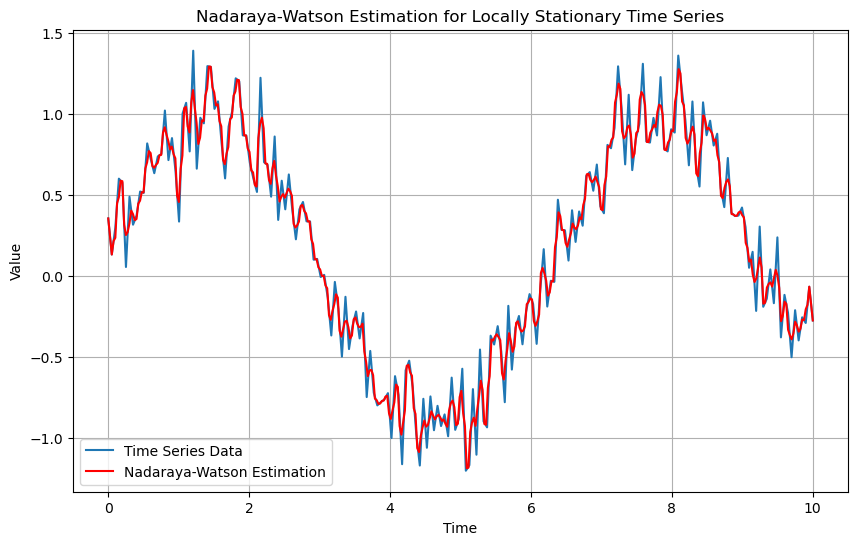

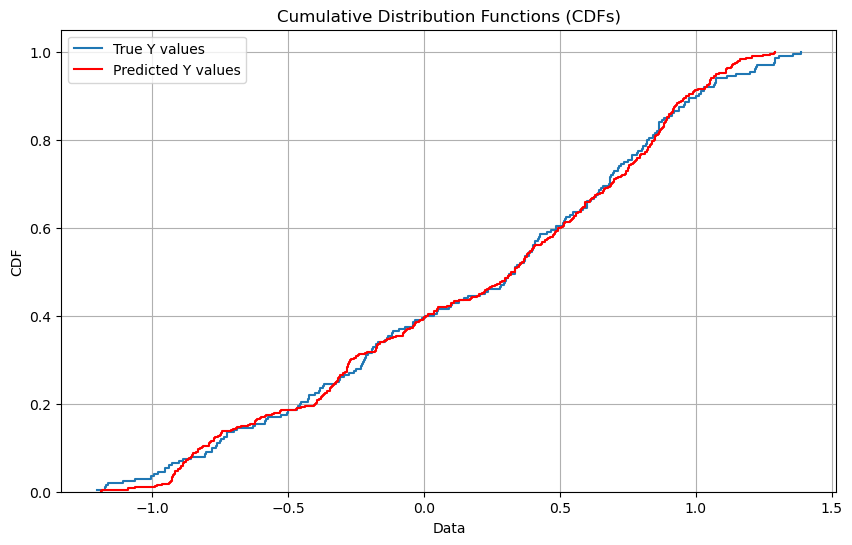

1-Wasserstein Distance: 0.0012500000000000002


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
from arch import arch_model

def nadaraya_watson_local_estimation(x, y, x_pred, kernel_width):
    """
    Calculate the Nadaraya-Watson estimator for locally stationary time series data.

    Parameters:
    - x: Array of input time points.
    - y: Array of corresponding time series values.
    - x_pred: Array of input time points for which predictions are to be made.
    - kernel_width: Width of the kernel function.

    Returns:
    - y_pred: Array of predicted time series values.
    """
    y_pred = []

    for x_star in x_pred:
        # Find the indices of data points within the bandwidth of x_star
        in_bandwidth = np.abs(x - x_star) <= kernel_width
        
        # Calculate the kernel weights for data points within the bandwidth
        kernel_weights = np.exp(-(x[in_bandwidth] - x_star) ** 2 / (2 * kernel_width ** 2))
        kernel_weights_local = np.exp(-(0) ** 2 / (2 * kernel_width ** 2))

        # Calculate the weighted average of y values using the kernel weights
        weighted_sum = np.sum(kernel_weights_local*kernel_weights * y[in_bandwidth])
        total_weight = np.sum(kernel_weights_local*kernel_weights)

        # Calculate the predicted y value
        if total_weight > 0:
            y_star = weighted_sum / total_weight
        else:
            y_star = 0  # Default prediction if total weight is 0

        y_pred.append(y_star)

    return np.array(y_pred)


# Example usage:
if __name__ == "__main__":
    # Generate some sample locally stationary time series data
    np.random.seed(0)
    t = np.linspace(0, 10, 200)
    y = np.sin(t) + 0.2 * np.random.randn(len(t))
    
    # Define the input time points for prediction
    t_pred = np.linspace(0, 10, 400)
    
    # Set the kernel width (you can adjust this parameter)
    kernel_width = 0.05
    
    # Calculate the Nadaraya-Watson estimator for locally stationary time series
    y_pred = nadaraya_watson_local_estimation(t, y, t_pred, kernel_width)
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(t, y, label="Time Series Data")
    plt.plot(t_pred, y_pred, label="Nadaraya-Watson Estimation", color='r')
    plt.legend()
    plt.grid(True)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Nadaraya-Watson Estimation for Locally Stationary Time Series")
    plt.show()

    # Generate two sets of random data
data1 = y
data2 = y_pred

# Sort the data
data1_sorted = np.sort(data1)
data2_sorted = np.sort(data2)

# Calculate the CDFs
cdf1 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)
cdf2 = np.arange(1, len(data2_sorted) + 1) / len(data2_sorted)

# Plot the CDFs
plt.figure(figsize=(10, 6))
plt.step(data1_sorted, cdf1, where='post', label='True Y values')
plt.step(data2_sorted, cdf2, where='post', label='Predicted Y values', color='r')
plt.xlabel('Data')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Functions (CDFs)')
plt.ylim([0, 1.05])
plt.legend()
plt.grid(True)
plt.show()

# Define two probability distributions (as arrays)
distribution1 = cdf1
distribution2 = cdf2

# Compute the 1-Wasserstein distance
distance = wasserstein_distance(distribution1, distribution2)

print("1-Wasserstein Distance:", distance)

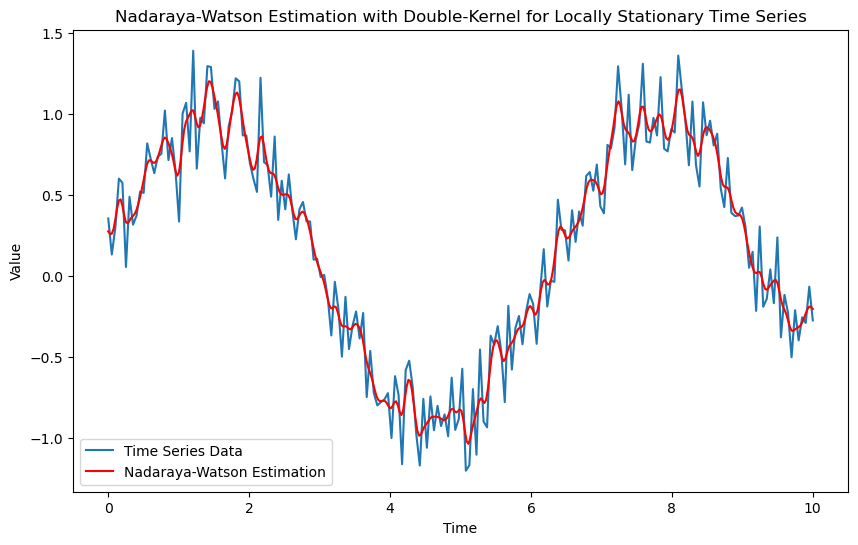

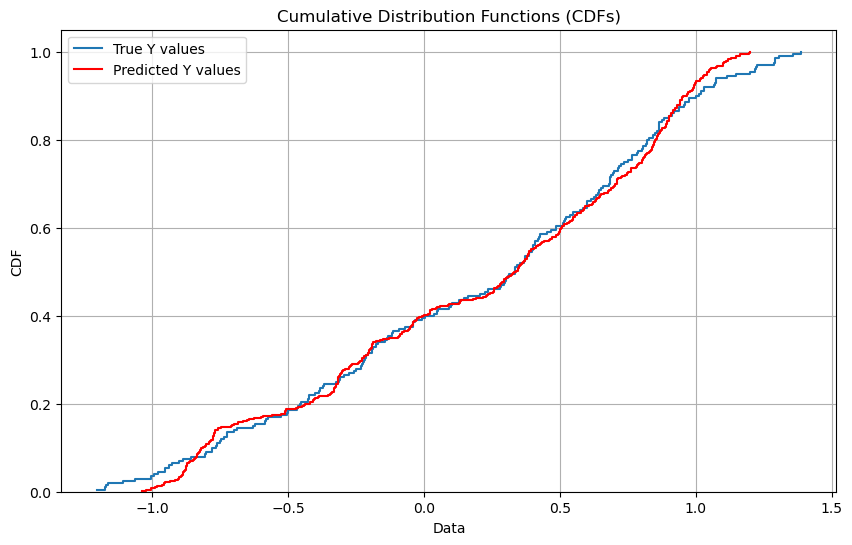

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def nadaraya_watson_local_estimation(x, y, x_pred, kernel_width, time_kernel_width=None):
    """
    Calculate the Nadaraya-Watson estimator for locally stationary time series data with double-kernel.

    Parameters:
    - x: Array of input time points.
    - y: Array of corresponding time series values.
    - x_pred: Array of input time points for which predictions are to be made.
    - kernel_width: Width of the kernel function for the covariate direction.
    - time_kernel_width: Width of the kernel function for the local time direction.

    Returns:
    - y_pred: Array of predicted time series values.
    """
    if time_kernel_width is None:
        time_kernel_width = kernel_width

    y_pred = []

    for x_star in x_pred:
        # Calculate the kernel weights for data points in both directions
        covariate_weights = np.exp(-(x - x_star) ** 2 / (2 * kernel_width ** 2))
        time_weights = np.exp(-(0) ** 2 / (2 * kernel_width ** 2))

        # Product of the two kernel weights
        combined_weights = covariate_weights * time_weights

        # Calculate the weighted average of y values using the combined weights
        weighted_sum = np.sum(combined_weights * y)
        total_weight = np.sum(combined_weights)

        # Calculate the predicted y value
        if total_weight > 0:
            y_star = weighted_sum / total_weight
        else:
            y_star = 0  # Default prediction if total weight is 0

        y_pred.append(y_star)

    return np.array(y_pred)

# Example usage:
if __name__ == "__main__":
    # Generate some sample locally stationary time series data
    np.random.seed(0)
    t = np.linspace(0, 10, 200)
    y = np.sin(t) + 0.2 * np.random.randn(len(t))
    
    # Define the input time points for prediction
    t_pred = np.linspace(0, 10, 400)
    
    # Set the kernel widths (you can adjust these parameters)
    kernel_width = 0.05
    #time_kernel_width = 1  # Adjusted based on the range of the time data
    
    # Calculate the Nadaraya-Watson estimator for locally stationary time series
    y_pred = nadaraya_watson_local_estimation(t, y, t_pred, kernel_width, time_kernel_width)
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(t, y, label="Time Series Data")
    plt.plot(t_pred, y_pred, label="Nadaraya-Watson Estimation", color='r')
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Nadaraya-Watson Estimation with Double-Kernel for Locally Stationary Time Series")
    plt.show()

    # Generate two sets of random data
    data1 = y
    data2 = y_pred

    # Sort the data
    data1_sorted = np.sort(data1)
    data2_sorted = np.sort(data2)

    # Calculate the CDFs
    cdf1 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)
    cdf2 = np.arange(1, len(data2_sorted) + 1) / len(data2_sorted)

    # Plot the CDFs
    plt.figure(figsize=(10, 6))
    plt.step(data1_sorted, cdf1, where='post', label='True Y values')
    plt.step(data2_sorted, cdf2, where='post', label='Predicted Y values', color='r')
    plt.xlabel('Data')
    plt.ylabel('CDF')
    plt.title('Cumulative Distribution Functions (CDFs)')
    plt.ylim([0, 1.05])
    plt.legend()
    plt.grid(True)
    plt.show()

In [31]:
from scipy.stats import wasserstein_distance

#Define two probability distributions (as arrays)
distribution1 = cdf1
distribution2 = cdf2

#Compute the 1-Wasserstein distance
distance = wasserstein_distance(distribution1, distribution2)

print(distance)

0.0012500000000000002
